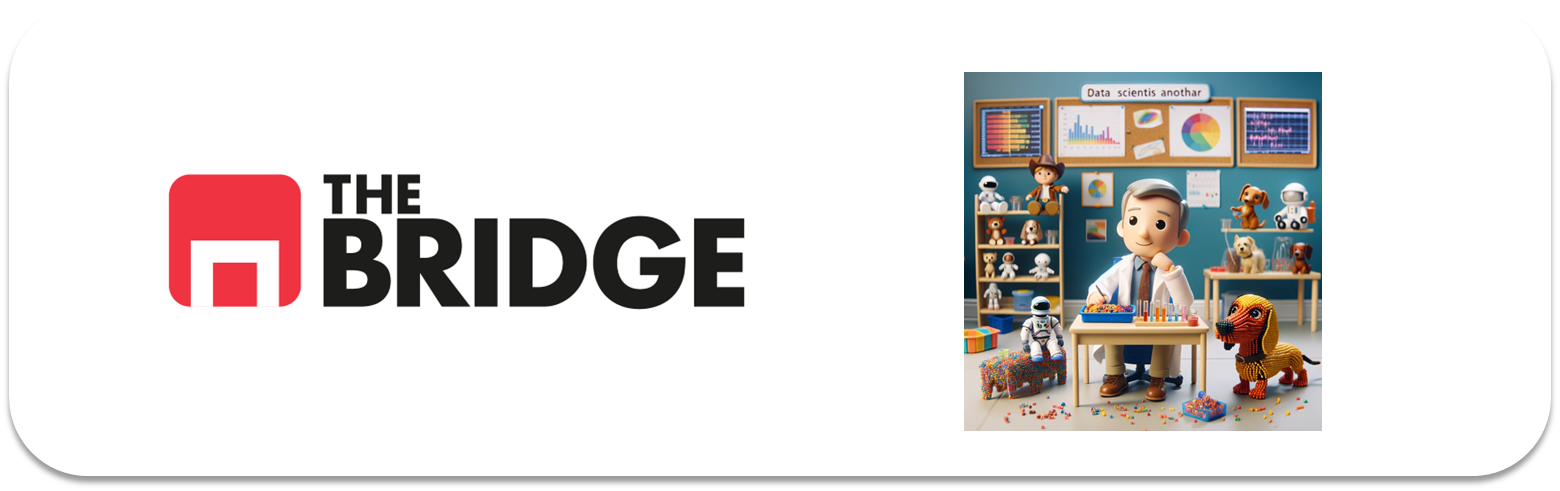

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("/Users/aliciamarzoa/Will/the_bridge/personal_projects/functions/")
import eda

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
titanicDF = pd.read_csv("./data/titanic.csv")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [3]:
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
titanicDF.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [5]:
titanicDF.isna().sum()/len(titanicDF)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [6]:
titanicDF.fillna({'age': titanicDF['age'].mean(),
                  'embarked': titanicDF['embarked'].mode().iloc[0],
                  'embark_town': titanicDF['embark_town'].mode().iloc[0]},
                  inplace=True
                  )

titanicDF['age'] = titanicDF['age'].astype('int64')
titanicDF.drop(columns=['deck', 'parch'], inplace=True)

In [7]:
titanicDF.head()

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,8.0500,S,Third,man,True,Southampton,no,True


In [8]:
titanicDF.isna().sum()/len(titanicDF)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [9]:
titanicDF['fare'].value_counts()

fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

| Columna/Variable | Descripción |
|-|-|
|survived|Survival status (0 = No, 1 = Yes)|
|pclass|Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)|
|sex|Passenger's gender (male,female)|
|age|Passenger's age|
|sibsp|Number of siblings/partner aboard|
|fare|Price paid for ticket|
|embarked|Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)|
|class|Equivalent to Pclass (1 = 1st class, 2 = 2nd class, 3 = 3rd class)|
|who|Passenger’s category (man, woman, child)|
|adult_male|Whether the passenger is an adult male or not (True or False)|
|embark_town|Port of embarkation (Cherbourg, Queenstown, Southampton)|
|alive|Survival status (yes or no)|
|alone|Whether the passenger is alone or not (True or False)|



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [10]:
def get_towns(initial):
    city_map = {
        'C': 'Cherbourg',
        'S': 'Southampton',
        'Q': 'Queenstown'
    }
    return city_map.get(initial, 'Unkown')

titanicDF['embark_town'] = titanicDF['embarked'].apply(get_towns)


In [11]:
titanicDF.head()

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,8.0500,S,Third,man,True,Southampton,no,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [12]:
titanic_cardinalidad = eda.cardinalidad(titanicDF, 5, 10)
titanic_cardinalidad.reset_index(names='variable', inplace=True)
titanic_cardinalidad

,variable,Card,%_Card,Clasification
0,survived,2,0.224467,Binario
1,pclass,3,0.336700,Categorica
2,sex,2,0.224467,Binario
3,age,71,7.968575,Numerica Discreta
4,sibsp,7,0.785634,Numerica Discreta
5,fare,248,27.833895,Numerica Continua
6,embarked,3,0.336700,Categorica
7,class,3,0.336700,Categorica
8,who,3,0.336700,Categorica
9,adult_male,2,0.224467,Binario


In [13]:
categoric_vars = titanic_cardinalidad.loc[titanic_cardinalidad['Clasification'].isin(['Binario','Categorica']), 'variable'].tolist()
numeric_vars = titanic_cardinalidad.loc[titanic_cardinalidad['Clasification'].isin(['Numerica Discreta','Numerica Continua']), 'variable'].tolist()
print("categoric_vars:", categoric_vars)
print("numeric_vars:", numeric_vars)

categoric_vars: ['survived', 'pclass', 'sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
numeric_vars: ['age', 'sibsp', 'fare']


In [14]:
selected_vars = ["survived","who","age","fare","class","embark_town","alone"]

In [15]:
selected_num = []
selected_cat = []

for var in selected_vars:
    if var in categoric_vars:
        selected_cat.append(var)
    else:
        selected_num.append(var)

In [16]:
print(selected_num)
print(selected_cat)

['age', 'fare']
['survived', 'who', 'class', 'embark_town', 'alone']


### #2.1 Categóricas

In [17]:
eda.print_val_counts(titanicDF, selected_cat)

para survived
survived
0    549
1    342
Name: count, dtype: int64



para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



para embark_town
embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64



para alone
alone
True     537
False    354
Name: count, dtype: int64





In [18]:
eda.print_val_counts(titanicDF, selected_cat, relativa=True)

para survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64



para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64



para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64



para embark_town
embark_town
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64



para alone
alone
True     60.26936
False    39.73064
Name: count, dtype: float64





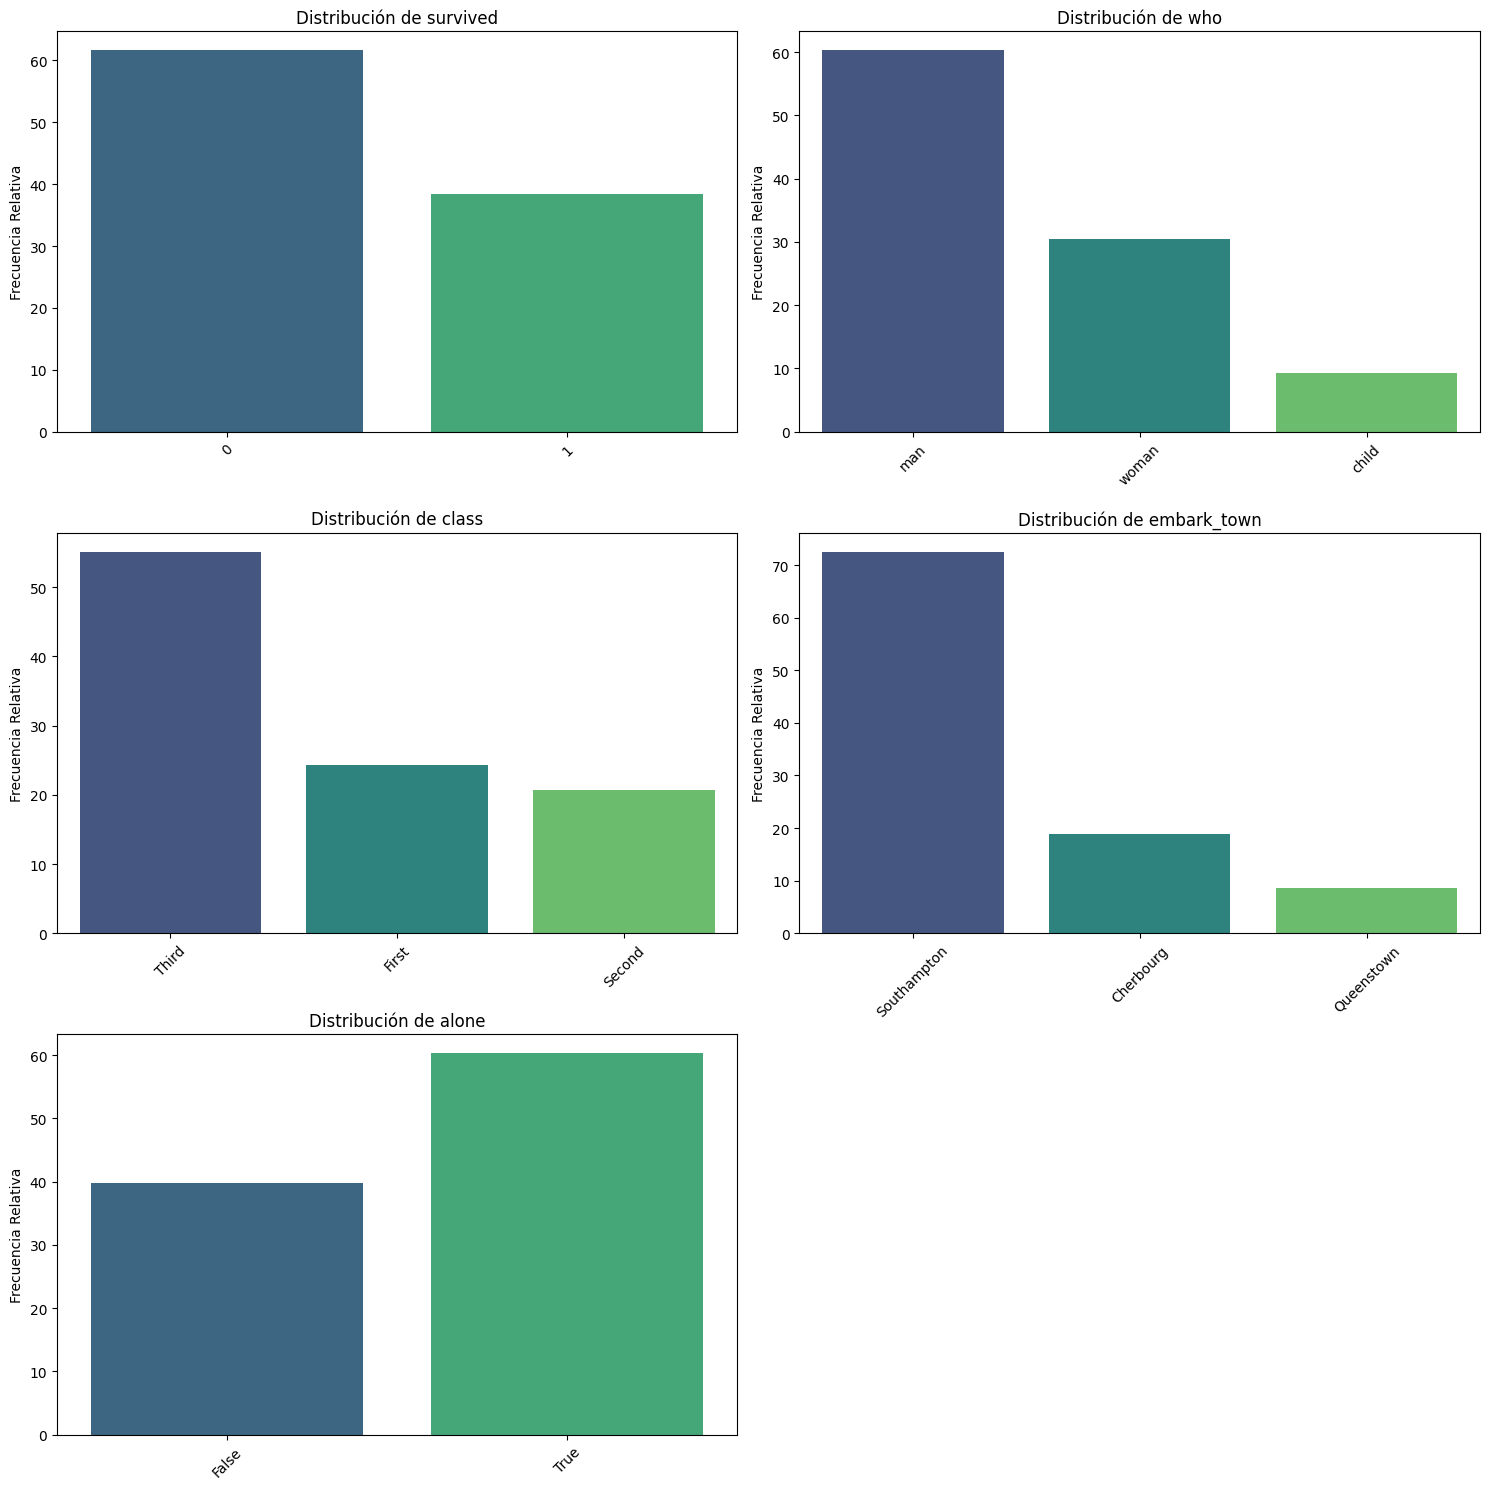

In [19]:
eda.pinta_distribucion_categoricas(titanicDF, selected_cat, relativa=True)

### #2.2 Numéricas

In [20]:
titanic_CT = eda.get_central_tends(titanicDF, cols=selected_num)
titanic_CT

,measure,count,mean,std,min,25%,50%,75%,max,IQR,range,CV
0,age,891.0,29.54,13.01,0.0,22.00,29.00,35.0,80.00,13.00,80.00,0.44
1,fare,891.0,32.20,49.69,0.0,7.91,14.45,31.0,512.33,23.09,512.33,1.54


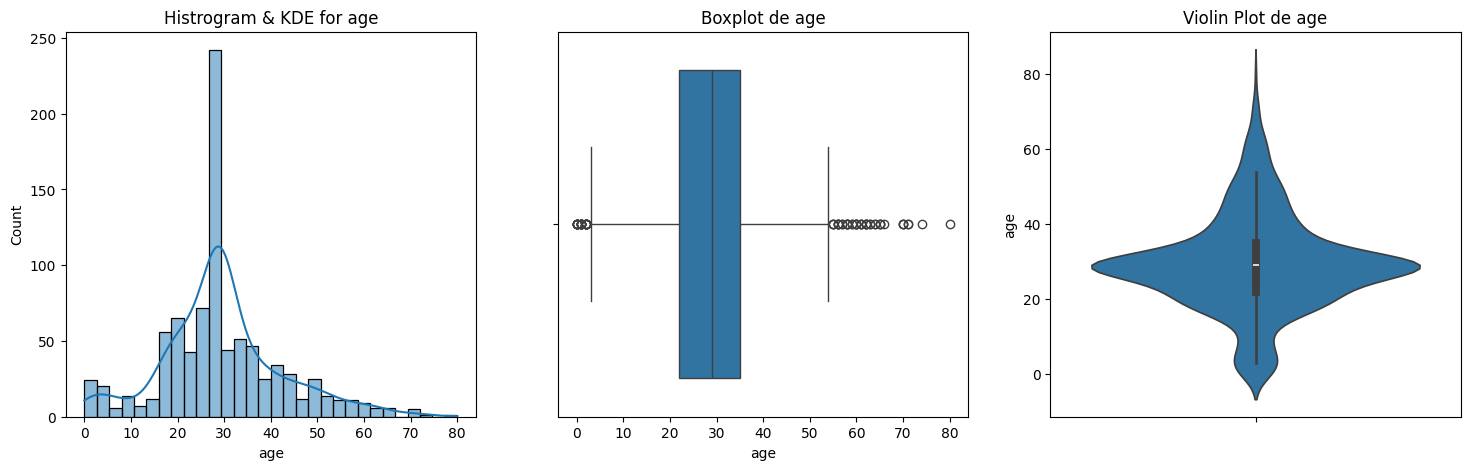

In [26]:
eda.plot_3_graphs(titanicDF, ['age'])

In [23]:
titanicDF['age'].value_counts()

age
29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: count, Length: 71, dtype: int64

Investigate peak at 29 years old. 
Is this a result of using fillna(mean)? 
Nearly 20% of the dataset was filled with age 29. Maybe there was a better way to have filled nans.

Interesting to see what percentage of the dataset make up the outliers for age

Quite low dispersion measures:
IQR: 13 years
CV: 0.44

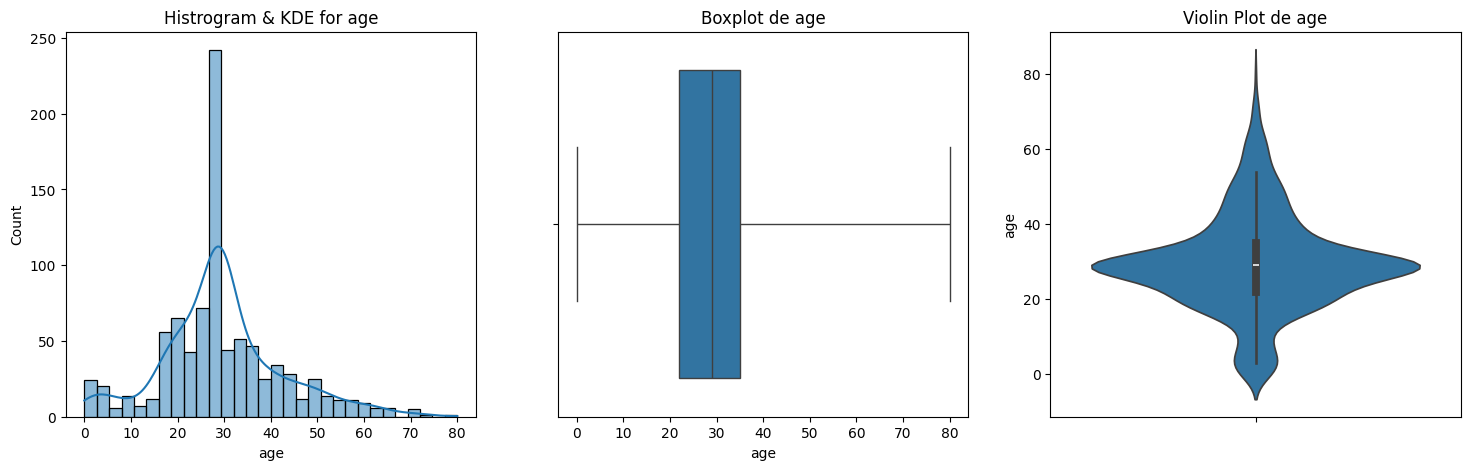

In [27]:
eda.plot_3_graphs(titanicDF, ['age'], whisker_width=4.5)

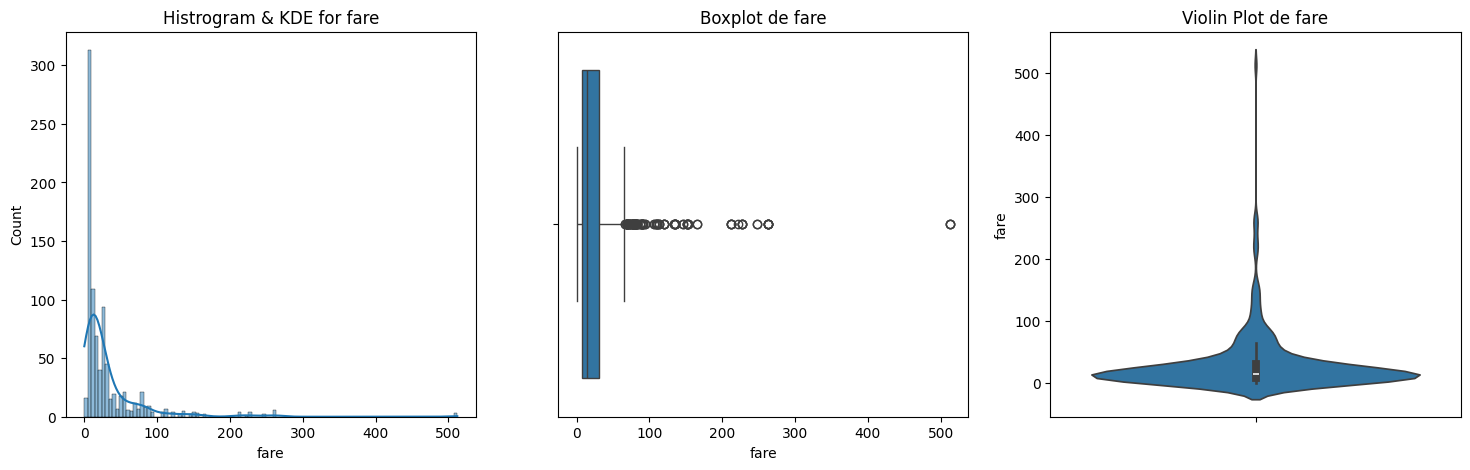

In [28]:
eda.plot_3_graphs(titanicDF, ['fare'])

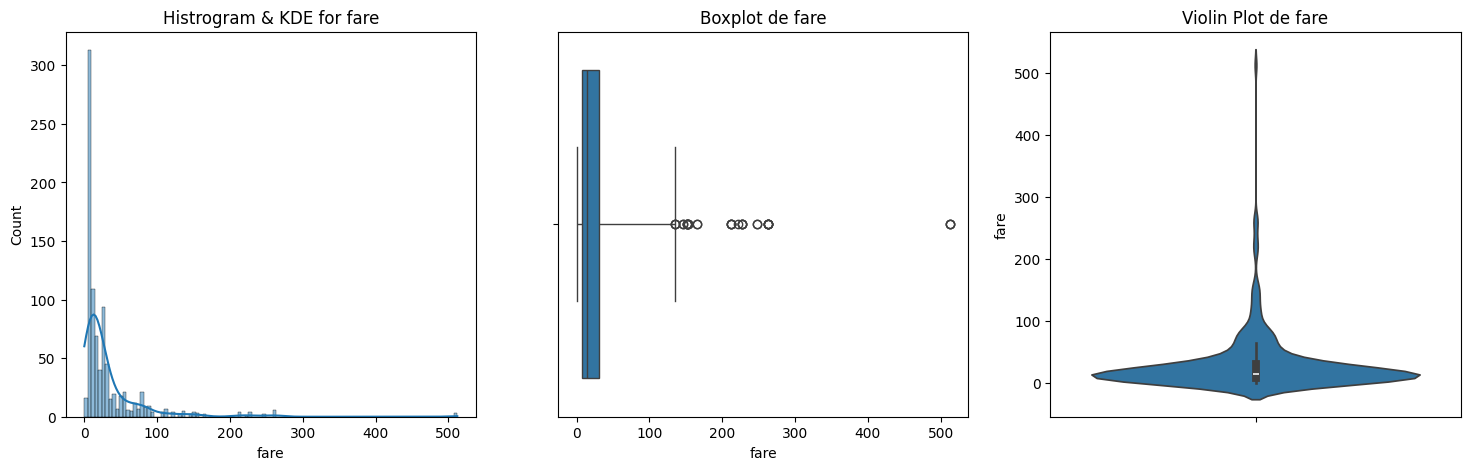

In [30]:
eda.plot_3_graphs(titanicDF, ['fare'], whisker_width=4.5)